## STEP-1

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\Jatin\Documents\05-05-InstaCartBasketAnalysis'

In [3]:
# import dataframe
df=pd.read_pickle(os.path.join(path,'2 Data','Prepared Data','customers_merged.pkl'))

In [4]:
df.shape

(32404859, 29)

## STEP-2

In [5]:
# first_name & last_name column has already been removed in last exercise. Apart from it, there are no other PII concerns.

## STEP-3

In [6]:
# create an empty container
region=[]
# creating region column based on state column
for value in df['state']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [7]:
df['region']=region

In [8]:
df['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [9]:
#creating a crosstab between region and spending_flag
region_spend=pd.crosstab(df['region'],df['spending_flag'],dropna=False)

In [10]:
region_spend.to_clipboard()

In [11]:
region_spend

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


## STEP-4

In [12]:
# create a column (activity_of_customer) where low order customer has value less than 5.
df.loc[df['max_order']>=5,'activity_of_customer']='High order customer'
df.loc[df['max_order']<5,'activity_of_customer']='Low order customer'

In [13]:
df['activity_of_customer'].value_counts(dropna=False)

High order customer    30964564
Low order customer      1440295
Name: activity_of_customer, dtype: int64

In [14]:
#create a subset of high order customer
df_high=df[df['activity_of_customer']=='High order customer']

In [15]:
# export high order customer
df_high.to_pickle(os.path.join(path,'2 Data','Prepared Data','df_high_order.pkl'))

## STEP-5,6,7,8,9

## AGE

In [16]:
# profiling based on AGE
df.loc[df['age']>65,'age_flag']='Senior'
df.loc[(df['age']<=65) & (df['age']>40),'age_flag']='Middle-age'
df.loc[df['age']<=40,'age_flag']='Young adult'

In [17]:
df['age_flag'].value_counts(dropna=False)

Middle-age     12646712
Young adult    11670046
Senior          8088101
Name: age_flag, dtype: int64

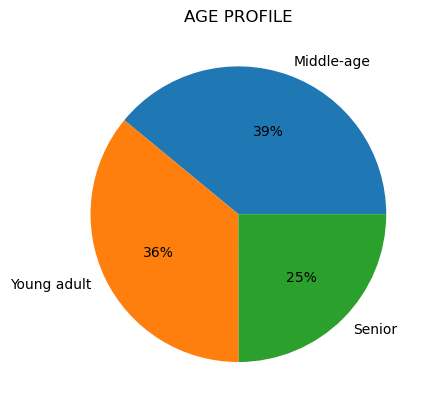

In [18]:
#create a pie chart of age variable
age_profile=df['age_flag'].value_counts().plot.pie(title='AGE PROFILE',label='',autopct=('%1.f%%'))

In [19]:
# exporting the viz
age_profile.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','age_profile.png'))

In [20]:
pd.options.display.max_columns=None

In [45]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,reordered,product_name,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_frequency,customer,gender,state,age,date_joined,total_dependants,marital_status,income,total_depandants,region,activity_of_customer,age_flag,department,income_flag
0,2539329,1,1,2,8,NaN,196,0,Soda,7,9,Mid range product,Regularly busy,Regular days,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,3,South,High order customer,Young adult,beverages,Low income
1,2398795,1,2,3,7,15.0,196,1,Soda,7,9,Mid range product,Regularly busy,Slowest days,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,3,South,High order customer,Young adult,beverages,Low income
2,473747,1,3,3,12,21.0,196,1,Soda,7,9,Mid range product,Regularly busy,Slowest days,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,3,South,High order customer,Young adult,beverages,Low income
3,2254736,1,4,4,7,29.0,196,1,Soda,7,9,Mid range product,Least busy,Slowest days,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,3,South,High order customer,Young adult,beverages,Low income
4,431534,1,5,4,15,28.0,196,1,Soda,7,9,Mid range product,Least busy,Slowest days,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,3,South,High order customer,Young adult,beverages,Low income


In [21]:
# age statistics
age_sums=df.groupby(['age_flag']).agg({'days_since_last_order':['min','max','mean'],'prices':['sum','max','mean']})

In [22]:
age_sums

days_since_last_order                     prices              
                              min   max       mean       sum max      mean
age_flag                                                                  
Middle-age                    0.0  30.0  11.113621  93019043  52  7.355196
Senior                        0.0  30.0  11.080923  59500586  52  7.356558
Young adult                   0.0  30.0  11.109790  85752500  52  7.348086

In [23]:
##customers in all age group have 11 days in between their orders

In [24]:
# creating a crosstab between region and age
region_age=pd.crosstab(df['region'],df['age_flag'],dropna=False)

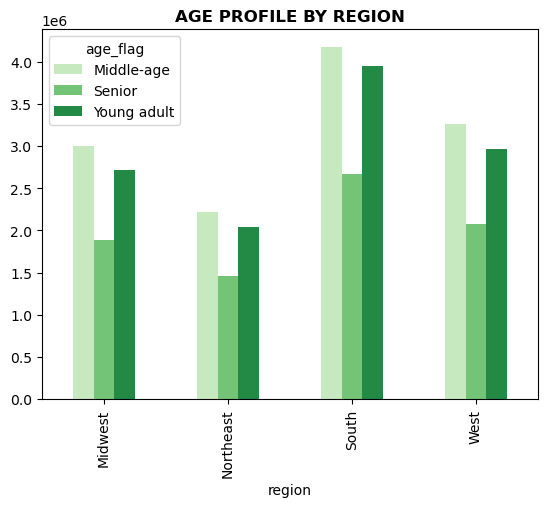

In [25]:
# create a bar chart between age and region
regions_age=region_age.plot.bar(color=sns.color_palette('Greens',3))
plt.title('AGE PROFILE BY REGION',fontweight='bold')
plt.show()

In [26]:
# exporting the viz
regions_age.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','region_age.png'))

In [27]:
#import department dataframe
df_dep=pd.read_csv(os.path.join(path,'2 Data','Prepared Data','departments_wrangled.csv'))

In [28]:
df_dep.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [29]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [30]:
#merging department data frame with df datadrame
df_final=df.merge(df_dep,on='department_id')

In [31]:
# creating a crosstab between department and age
department_age=pd.crosstab(df_final['department'],df_final['age_flag'],dropna=False)

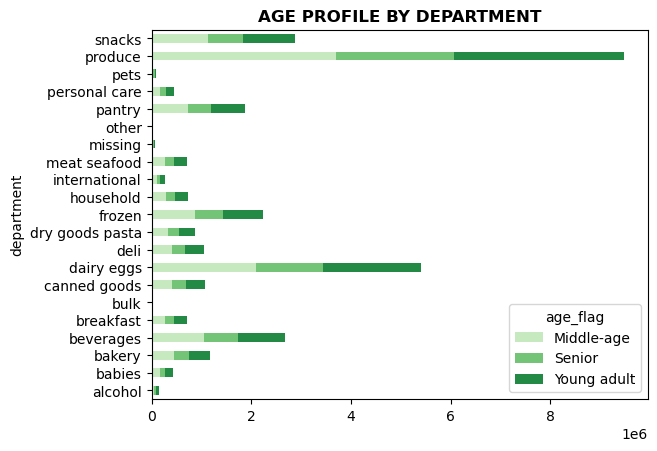

In [32]:
#creating a stacked bar chart of age and department
dept_age=department_age.plot.barh(stacked=True,color=sns.color_palette('Greens',3))
plt.title('AGE PROFILE BY DEPARTMENT',fontweight='bold')
plt.show()

product, dairy and snacks are the top three departments across all three age groups.

In [33]:
# exporting the viz
dept_age.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','department_age.png'))

## INCOME

In [34]:
#profiling based on income
df_final.loc[df_final['income']<=50000,'income_flag']='Low income'
df_final.loc[(df_final['income']>50000) & (df_final['income']<=120000),'income_flag']='Middle income'
df_final.loc[df_final['income']>120000,'income_flag']='High income'

In [35]:
df_final['income_flag'].value_counts(dropna=False)

Middle income    19239676
High income       9571100
Low income        3594083
Name: income_flag, dtype: int64

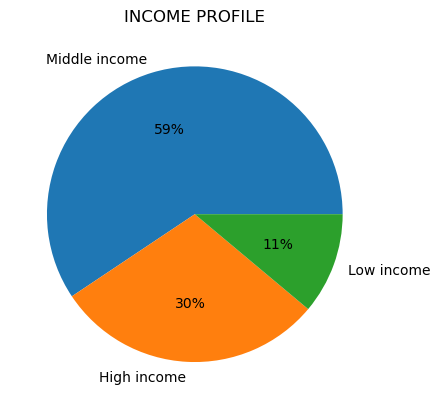

In [36]:
#create pie chart
income_profile=df_final['income_flag'].value_counts().plot.pie(title='INCOME PROFILE',label='',autopct=('%1.f%%'))

In [37]:
# exporting the viz
income_profile.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','income_profile.png'))

In [38]:
# income statistics
income_sums=df_final.groupby(['income_flag']).agg({'days_since_last_order':['max','mean'],'prices':['max','mean','sum']})

In [39]:
income_sums

days_since_last_order            prices                     
                                max       mean    max      mean        sum
income_flag                                                               
High income                    30.0  11.029443     52  7.526970   72041381
Low income                     30.0  11.587220     25  6.259981   22498892
Middle income                  30.0  11.051922     52  7.470596  143731856

Middle income i.e. 50k-120k represent highest revenue for instacart. 

In [40]:
#creating crosstab between income and region
income_region=pd.crosstab(df_final['region'],df_final['income_flag'],dropna=False)

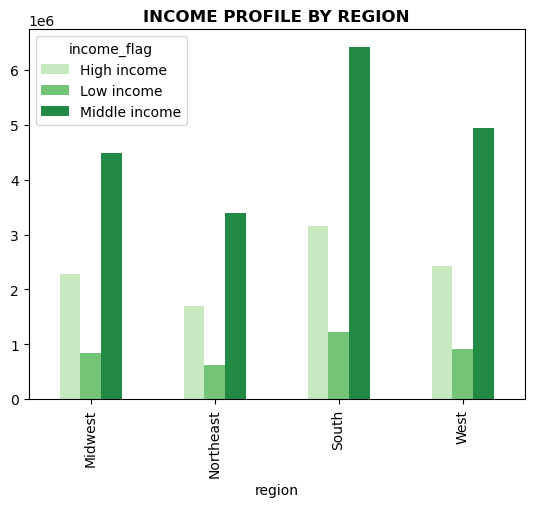

In [41]:
# creating bar chart
income_regions=income_region.plot.bar(color=sns.color_palette('Greens',3))
plt.title('INCOME PROFILE BY REGION',fontweight='bold')
plt.show()

In [42]:
# exporting the viz
income_regions.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','income_regions.png'))

In [43]:
# creating crosstab between income and department
department_income=pd.crosstab(df_final['department'],df_final['income_flag'],dropna=False)

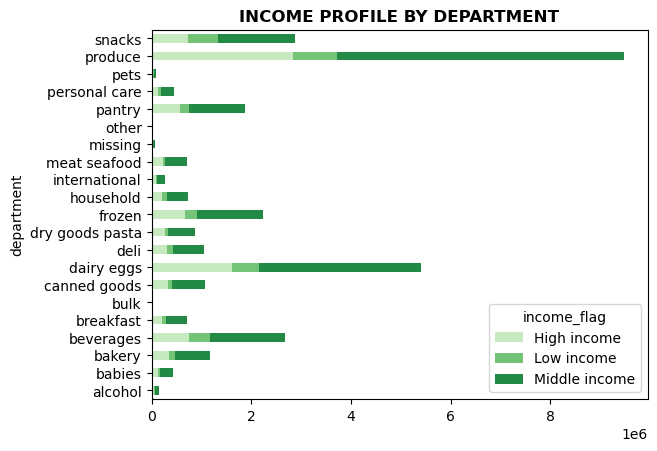

In [44]:
# creating stacked bar chart
dept_income=department_income.plot.barh(stacked=True,color=sns.color_palette('Greens',3))
plt.title('INCOME PROFILE BY DEPARTMENT',fontweight='bold')
plt.show()    

Produce,dairy and snacks are the top three products according to income.

In [45]:
# exporting the viz
dept_income.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','dependent_income.png'))

## DEPENDENTS

In [49]:
# profiling based on dependents
df_final.loc[df_final['total_depandants']==0,'family_flag']='Single'
df_final.loc[df_final['total_depandants']!=0,'family_flag']='Family'

In [50]:
df_final['family_flag'].value_counts(dropna=False)

Family    24307356
Single     8097503
Name: family_flag, dtype: int64

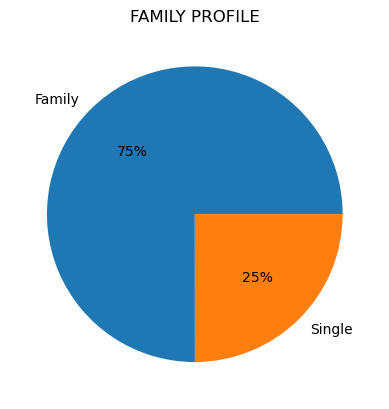

In [51]:
# creating a pie chart
family_profile=df_final['family_flag'].value_counts().plot.pie(title='FAMILY PROFILE',label='',autopct=('%1.f%%'))

In [52]:
# exporting the viz
family_profile.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','family_profile.png'))

In [53]:
# family statistics
family_sums=df_final.groupby(['family_flag']).agg({'days_since_last_order':['max','mean'],'prices':['max','mean','sum']})

In [54]:
family_sums

days_since_last_order            prices                     
                              max       mean    max      mean        sum
family_flag                                                             
Family                       30.0  11.111834     52  7.353513  178744459
Single                       30.0  11.080806     52  7.351361   59527670

Customers with family represent highest proprtion of customers and highest revenue for instacart.

In [55]:
# creating a crosstab between dependents and region
region_dependent=pd.crosstab(df_final['region'],df_final['family_flag'],dropna=False)

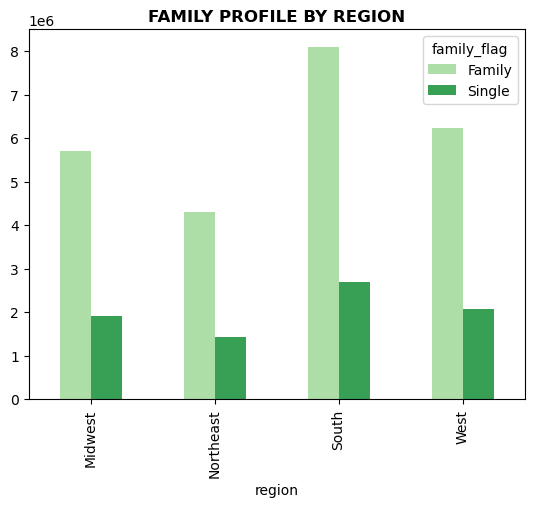

In [56]:
#creating bar chart
region_dependents=region_dependent.plot.bar(color=sns.color_palette('Greens',2))
plt.title('FAMILY PROFILE BY REGION',fontweight='bold')
plt.show()

In [57]:
# exporting the viz
region_dependents.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','region_dependents.png'))

In [58]:
# creating a crosstab between dependent & department- normalized
crosstab_dept_depend_1=pd.crosstab(index=df_final['department'],columns=df_final['family_flag'],normalize='index')


In [59]:
# creating second crosstab to put labels on chart
crosstab_dept_depend_2=pd.crosstab(index=df_final['department'],columns=df_final['family_flag'])

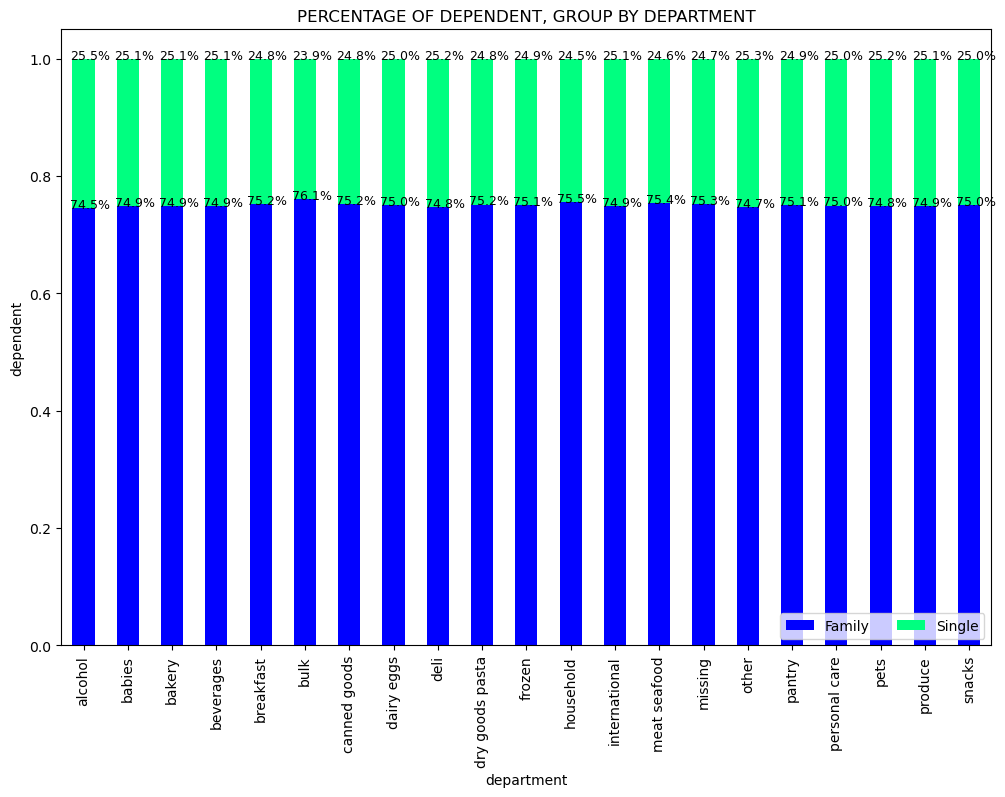

In [60]:
# normalize bar chart of dependent , group by department
stacked_dept_depend = crosstab_dept_depend_1.plot(kind='bar', stacked=True, colormap='winter', figsize=(12, 8))
plt.title('PERCENTAGE OF DEPENDENT, GROUP BY DEPARTMENT')
plt.legend(loc='lower right', ncol=2)
plt.xlabel('department')
plt.ylabel('dependent')

for n, x in enumerate([*crosstab_dept_depend_2.index.values]):
    for proportion, y_loc in zip(crosstab_dept_depend_1.loc[x], crosstab_dept_depend_1.loc[x].cumsum()):
        plt.text(x=n - 0.30,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color='black',
                 fontsize=9)

plt.show()

In [61]:
# exporting the viz
stacked_dept_depend.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','department_dependents.png'))

In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               object 
 1   user_id                object 
 2   order_number           int8   
 3   orders_day_of_week     int8   
 4   order_hour_of_day      int8   
 5   days_since_last_order  float16
 6   product_id             int32  
 7   reordered              int8   
 8   product_name           object 
 9   department_id          int8   
 10  prices                 int8   
 11  price_range_loc        object 
 12  busiest_day            object 
 13  busiest_days           object 
 14  busiest_period_of_day  object 
 15  max_order              int8   
 16  loyalty_flag           object 
 17  avg_price              float16
 18  spending_flag          object 
 19  median_frequency       float16
 20  customer               object 
 21  gender                 object 
 22  state           

In [47]:
# dropping this cloumn as this column appeared two times in dataframe
df_final=df_final.drop(columns=['total_dependants'])

In [62]:
## exporting the data
df_final.to_pickle(os.path.join(path,'2 Data','Prepared Data','df_final.pkl'))